In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics 
from sklearn.metrics import confusion_matrix
# Import accuracy score 
from sklearn.metrics import accuracy_score
#Importing LabelEncoder 
from sklearn import preprocessing
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
data=pd.read_csv('HR_comma_sep.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
le=preprocessing.LabelEncoder()
data['Encoded Salary']=le.fit_transform(data['salary'])
data['Dept']=le.fit_transform(data['sales'])

print(data[['Encoded Salary','Dept']])

       Encoded Salary  Dept
0                   1     7
1                   2     7
2                   2     7
3                   1     7
4                   1     7
...               ...   ...
14994               1     8
14995               1     8
14996               1     8
14997               1     8
14998               1     8

[14999 rows x 2 columns]


In [6]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
pd.unique(data[['sales','Dept']].values.ravel('K'))

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', 7, 2, 3, 9, 8, 4, 0, 6,
       5, 1], dtype=object)

In [8]:
# Spliting data into Features
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Dept', 'Encoded Salary']]

y=data['left']



# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 70% training and 30% test

In [22]:
clf=MLPClassifier(hidden_layer_sizes=(6,5),
                 random_state=5,
                 verbose=False,
                 learning_rate_init=0.01)

In [23]:
clf.fit(X_train,y_train)
clf.loss_curve_

[0.6143518816732237,
 0.5737744931173342,
 0.553080690155228,
 0.5198236314693025,
 0.4941087757562591,
 0.49836247175737425,
 0.46911134887470685,
 0.47278825403804275,
 0.4708286234343053,
 0.4592910931823533,
 0.4598318583066757,
 0.4549790111412244,
 0.45639166128059644,
 0.4515949785540703,
 0.45325207650748284,
 0.46638641828624905,
 0.4525905739592712,
 0.4555117186111838,
 0.4604458421823257,
 0.4576458089168207,
 0.4631546069076525,
 0.4404748971608895,
 0.42967060006572555,
 0.41790311775094036,
 0.3951371145026437,
 0.3839850024507137,
 0.3629750607325795,
 0.3527000019632464,
 0.34618764502586247,
 0.32700979300401506,
 0.3237918768090446,
 0.3163236266716445,
 0.3147085859476483,
 0.3103864213882699,
 0.3062725806336084,
 0.29602472208159986,
 0.2926872750208526,
 0.2970304558730471,
 0.2910786898963584,
 0.2907937946808893,
 0.2991010891621636,
 0.28894631118815434,
 0.27967545298213226,
 0.28117439013835116,
 0.28418027930187295,
 0.28007663607059013,
 0.2845576073606313

In [24]:
testX = [[0.37,0.32,2,188,3,0,0,7,0]]  
testpred=clf.predict(testX)
print("testpred is :", testpred)

if testpred == 0: 
  print("Employee will stay")
else:
  print("Employee will leave")

testpred is : [1]
Employee will leave


C:\Users\shashank adiga\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


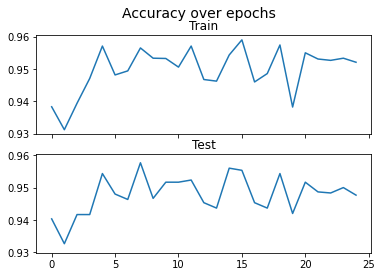

In [32]:

N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    #print('epoch: ', epoch)
    # SHUFFLING
    # Do randon permutation umtil the # of rows in dataset. Here it is 14,999
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0

    #Do mini-batch training until # of rows are reached 
    while True:
        # MINI-BATCH
        # Do for a random # of rows + fixed batch sixe 
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        # Fit the MLP Classifier 
        clf.partial_fit(X_train.iloc[indices], y_train.iloc[indices], classes=N_CLASSES)
        # Do for the rest after the previous mini-batch index 
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # ACCURACY SCORE FOR TRAIN
    scores_train.append(clf.score(X_train, y_train))

    # ACCURACY SCORE FOR TEST
    scores_test.append(clf.score(X_test, y_test))

    epoch += 1

""" Plotting the Accuracy Score Over the 25 Epochs"""
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

In [27]:


# Make prediction on train dataset
ypredtrain = clf.predict(X_train)

# Calcuate accuracy
print("Accuracy Score for Train Data is",accuracy_score(y_train,ypredtrain))

# Make prediction on test dataset
ypredtest=clf.predict(X_test)

# Calcuate accuracy
print("Accuracy Score for Test Data is", accuracy_score(y_test,ypredtest))


Accuracy Score for Train Data is 0.9455787982331861
Accuracy Score for Test Data is 0.938


In [28]:
from sklearn.metrics import confusion_matrix
conftrain=confusion_matrix(y_train,ypredtrain)
print("Train Confusion Matrix is\n", conftrain)
 

Train Confusion Matrix is
 [[8699  435]
 [ 218 2647]]


In [29]:

conftest=confusion_matrix(y_test,ypredtest)
print("Test Confusion Matrix is\n", conftest)

Test Confusion Matrix is
 [[2175  119]
 [  67  639]]


In [30]:

TN, FN, FP, TP = metrics.confusion_matrix(list(y_test), list(ypredtest), labels=[0, 1]).ravel() #0,1 is default label of sklearn

print("\n For Test Data")
print("\nTH",TN)
print("\nTP",TP)
print("\nFH",FN)
print("\nFP",FP)


 For Test Data

TH 2175

TP 639

FH 119

FP 67


In [31]:
TN, FN, FP, TP = metrics.confusion_matrix(list(y_train), list(ypredtrain), labels=[0, 1]).ravel() #0,1 is default label of sklearn

print("\n For Train Data")
print("\nTH",TN)
print("\nTP",TP)
print("\nFH",FN)
print("\nFP",FP)


 For Train Data

TH 8699

TP 2647

FH 435

FP 218
